<a href="https://colab.research.google.com/github/lizzydale3/Oceanography-Code/blob/main/Copy_of_thesisCleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import statements
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
import scipy.stats
import pandas as pd
from datetime import datetime
import glob
import matplotlib.pyplot as plt
import seaborn as sn
import math
from matplotlib import cm
from scipy.interpolate import make_interp_spline, BSpline

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#filepaths
taxGroup = '/content/drive/MyDrive/Colab Notebooks/Thesis/Marine_Phytoplankton_Samples_by_Taxonomic_Group.csv'
CTD = '/content/drive/MyDrive/Colab Notebooks/Thesis/Water_Quality (1).csv'

df2 = pd.read_csv(taxGroup,parse_dates=['Collect Date'],index_col = ['Collect Date'])
df2.fillna('', inplace=True)
df2 = df2.rename(columns={'Biovolume (mm^3/L)': 'Biovolume'})
df2.dropna()

df3 = pd.read_csv(CTD, parse_dates=['Collect DateTime'],index_col = ['Collect DateTime'], usecols=['Sample Number', 'Collect DateTime', 'Site', 'Parameter', 'Value', 'Units'],skip_blank_lines = True)
df3['Value'] = df3['Value'].astype(float)
df3.dropna()

,Sample Number,Site,Parameter,Value,Units
Collect DateTime,,,,,
2015-09-21 10:29:00,L63668-18,Point Wells,Temperature,13.0,deg C
2016-10-04 09:50:00,L66104-20,Point Williams,"Salinity, Field",30.8,PSS
2015-07-06 11:42:00,L63059-25,West Point Outfall,Salinity,29.9,PSS
2015-09-22 11:41:00,L63672-15,Point Williams,"Salinity, Field",30.5,PSS
2014-07-07 12:44:00,L60484-30,South Central Elliott Bay,Temperature,11.7,deg C
...,...,...,...,...,...
2021-12-06 09:04:00,L78117-9,Jefferson Head,Temperature,10.2,deg C
2021-12-07 12:12:00,L78120-29,East Passage,Temperature,10.4,deg C
2021-12-07 10:22:00,L78120-15,Point Williams,"Dissolved Oxygen, Field",7.8,mg/L


In [ ]:
#Water Quality function
def par (LH, indie):
  CTD = df3.loc[df3['Site'] == LH]
  Temp = CTD.loc[CTD['Parameter'] == 'Temperature']

  Chl1 = CTD.loc[CTD['Parameter'] == 'Chlorophyll a']
  Chl2 = CTD.loc[CTD['Parameter'] == 'Chlorophyll a, Field']
  frame1 = [Chl1, Chl2]
  Chl = pd.concat(frame1)

  Sal1 = CTD.loc[CTD['Parameter'] == 'Salinity']
  Sal2 = CTD.loc[CTD['Parameter'] == 'Salinity, Field']
  frame2 = [Sal1, Sal2]
  Sal = pd.concat(frame2)


  Oxy1 = CTD.loc[CTD['Parameter'] == 'Dissolved Oxygen']
  Oxy2 = CTD.loc[CTD['Parameter'] == 'Dissolved Oxygen, Field']
  frame3 = [Oxy1, Oxy2]
  Oxy = pd.concat(frame3)

  Nit = CTD.loc[CTD['Parameter'] == 'Nitrite + Nitrate Nitrogen']
  if indie == 'CTD':
    return (CTD)
  elif indie == 'Temp':
    return(Temp)
  elif indie == 'Chl':
    return(Chl)
  elif indie == 'Sal':
    return(Sal)
  elif indie == 'Oxy':
    return(Oxy)
  elif indie == 'Nit':
    return(Nit)
#ie, par('Alki Outfall', 'Chlory'/'Temp'/'Chl'/'Sal'/'Oxy'/'Nit')

In [ ]:
#order biovolume averages/function
Dinos = df2.loc[df2['Class']=='Dinophyceae'].drop(['Quality', 'Steward Note', 'Replicates','Replicates Of', 'DataSource', 'Grab ID', 'Profile ID', 'Sample ID'], axis = 1)

Alki = Dinos.loc[Dinos['Site Name'] == 'Alki Outfall']
Dock = Dinos.loc[Dinos['Site Name'] == 'Dockton Park']
East = Dinos.loc[Dinos['Site Name'] == 'East Passage']
Plant = Dinos.loc[Dinos['Site Name'] == 'South Plant Outfall']
Jeff = Dinos.loc[Dinos['Site Name'] == 'Jefferson Head']
Will = Dinos.loc[Dinos['Site Name'] == 'Point Williams']
West = Dinos.loc[Dinos['Site Name'] == 'West Point Outfall']
Vash = Dinos.loc[Dinos['Site Name'] == 'Vashon Outfall']
Wells = Dinos.loc[Dinos['Site Name'] == 'Point Wells']
Central = Dinos.loc[Dinos['Site Name'] == 'South Central Elliott Bay']


sites = [Alki, Dock, East, Plant, Jeff, Will, West, Vash, Wells, Central]
def gen (g):
  alist = []
  means = []
  for i in range(10):
    alist.append(sites[i].loc[sites[i]['Genus'] == g])
    means.append(alist[i]['Biovolume'].mean())
  return means


Kat = gen('Katodinium')
Pror = gen('Prorocentrum')
Neo = gen('Neoceratium (prev. Ceratium)')
Pro = gen('Protoperidinium')
Din = gen('Dinophysis')
Aka = gen('Akashiwo')
Noc = gen('Noctiluca')
Amp = gen('Amphidinium')
Hee = gen('Heterocapsa')
Scr = gen('Scrippsiella')
Tor = gen('Torodinium')
Gon = gen('Gonyaulax')
Pro = gen('Protoceratium')
Kar = gen('Karlodinium')
Amy = gen('Amylax')
Pha = gen('Phalacroma (prev. Dinophysis)')
Pol = gen('Polykrikos')
Coc  = gen('Cochlodinium')
Alex = gen('Alexandrium')
Nema = gen('Nematodinium')
Other = gen('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:125: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<BarContainer object of 10 artists>

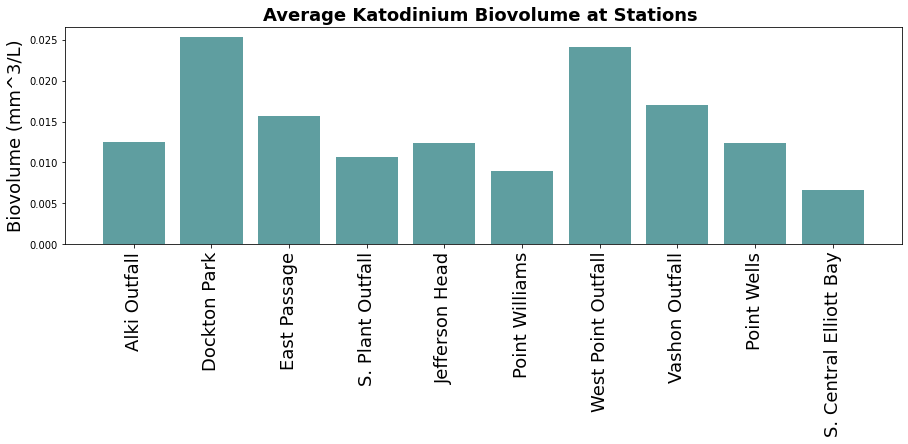

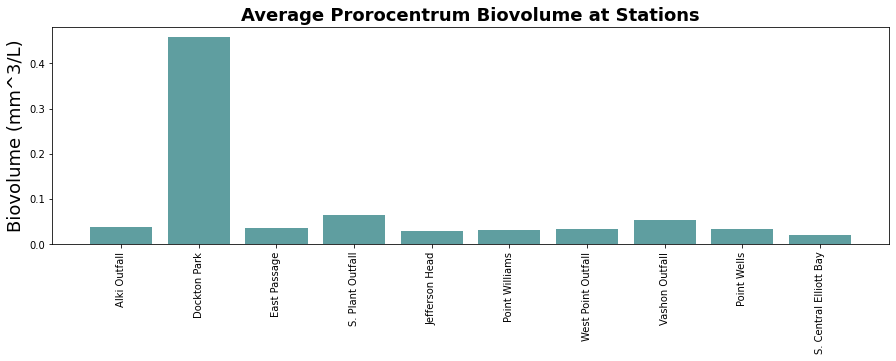

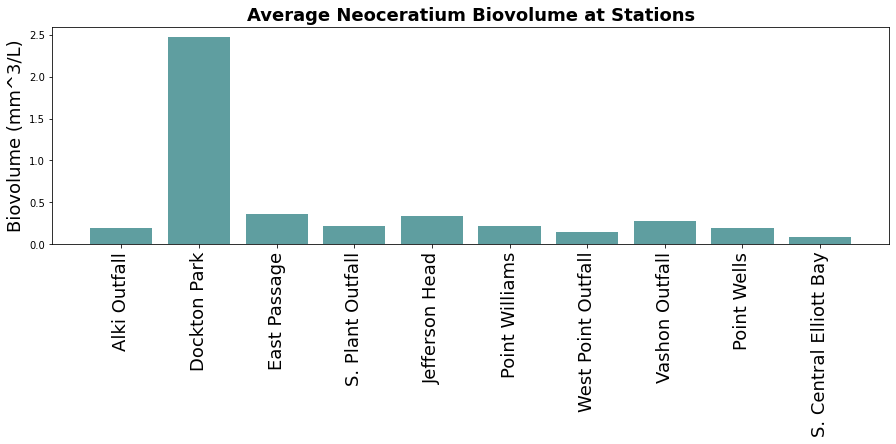

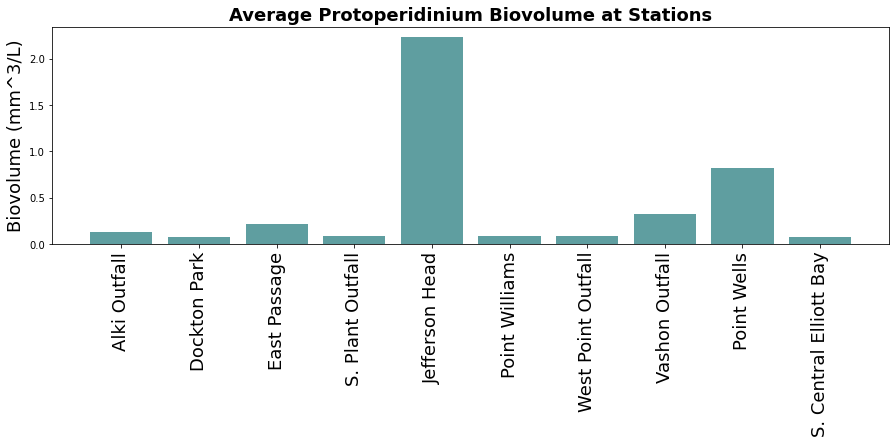

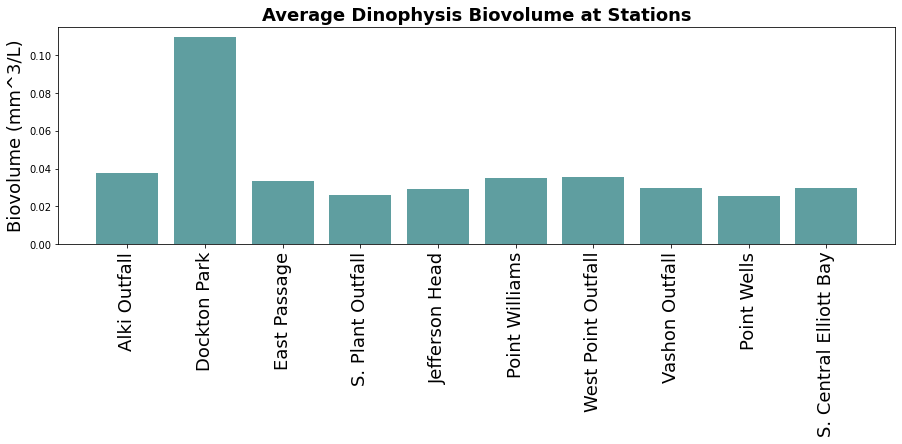

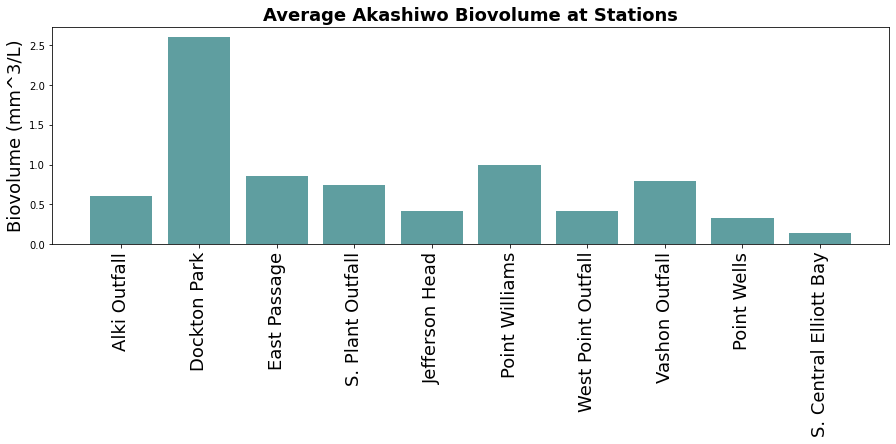

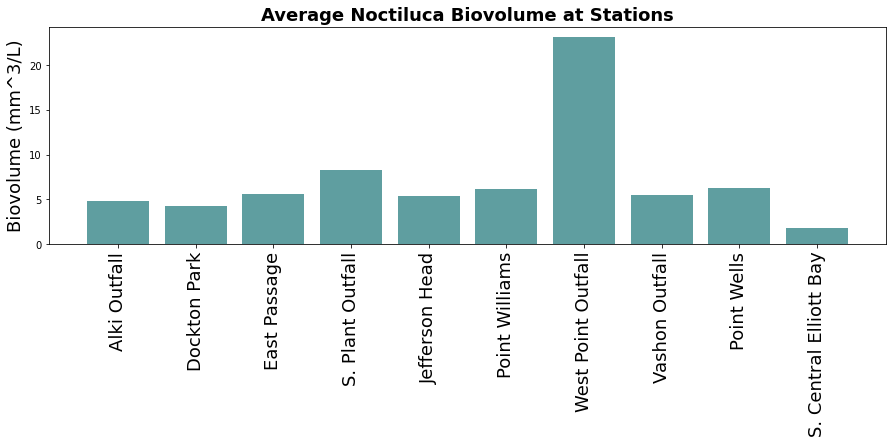

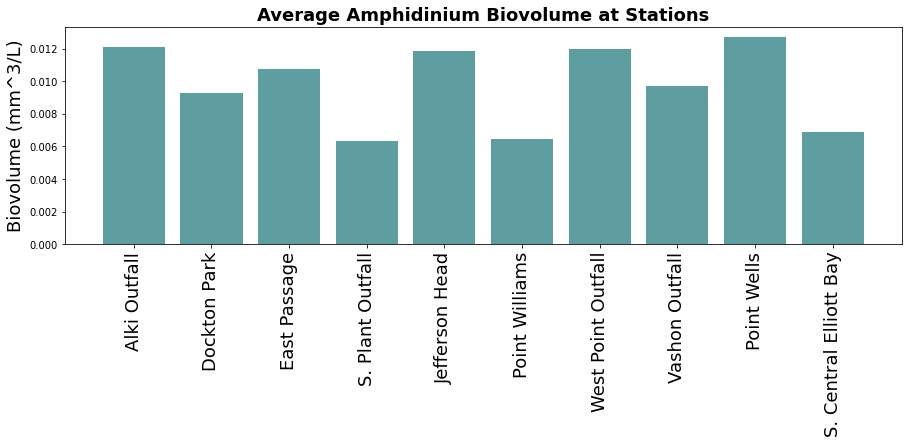

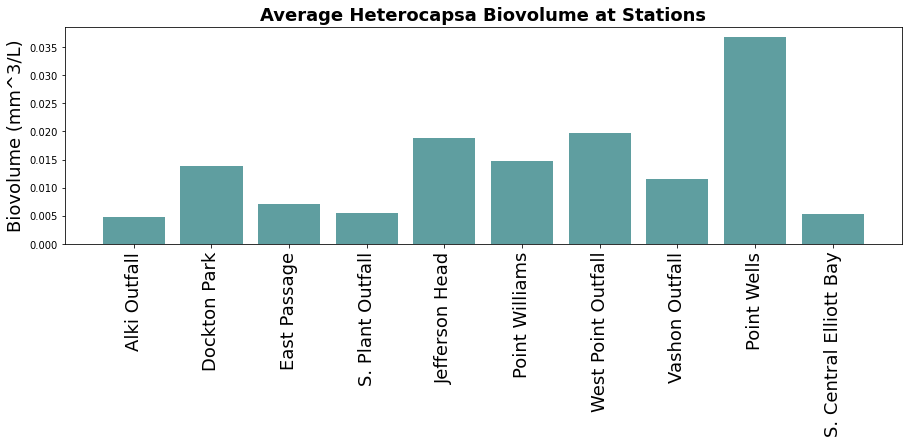

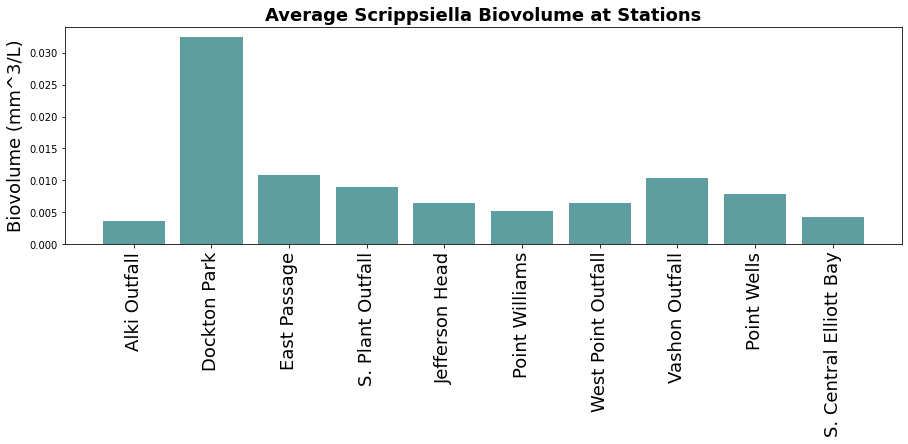

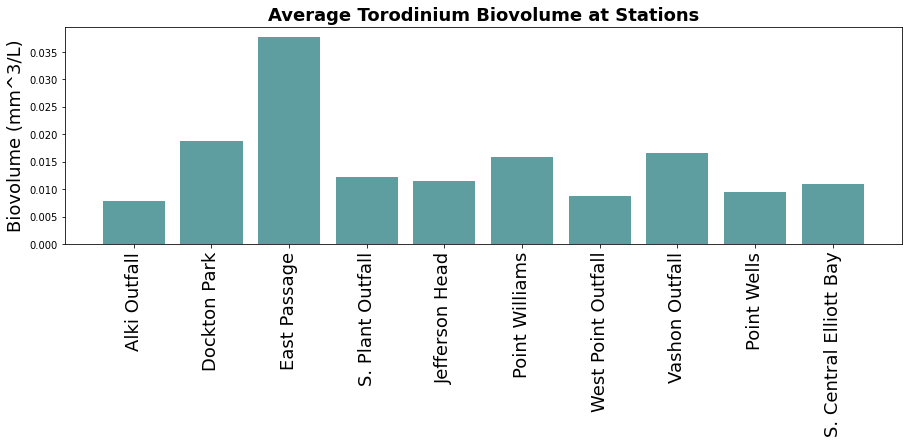

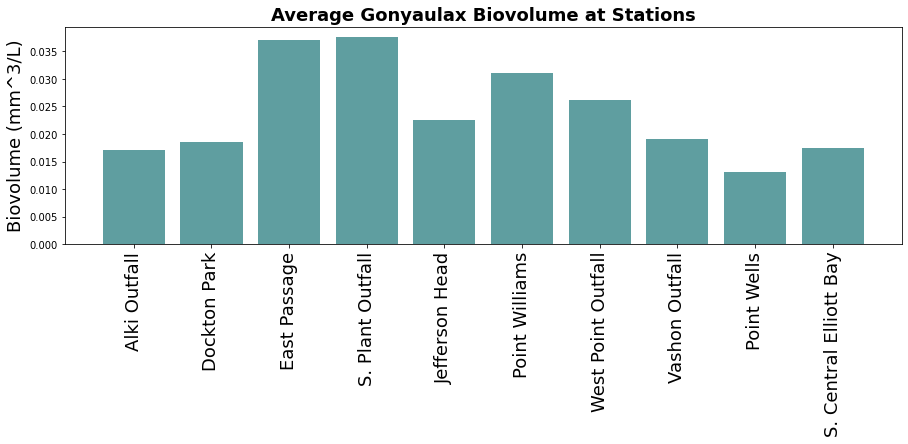

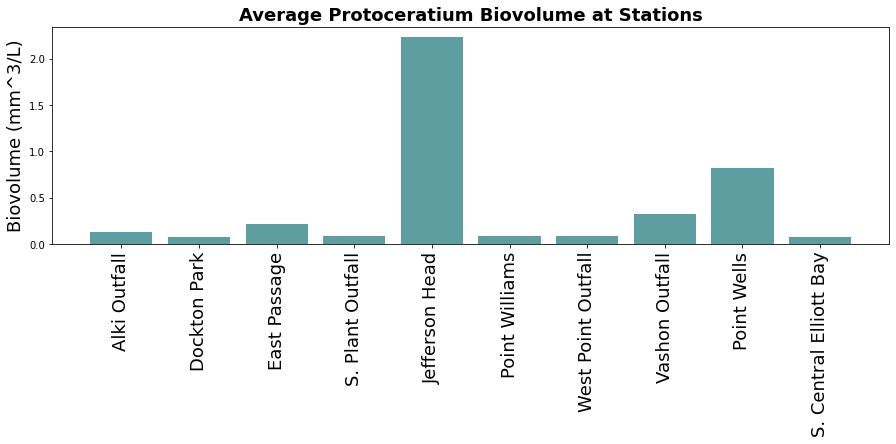

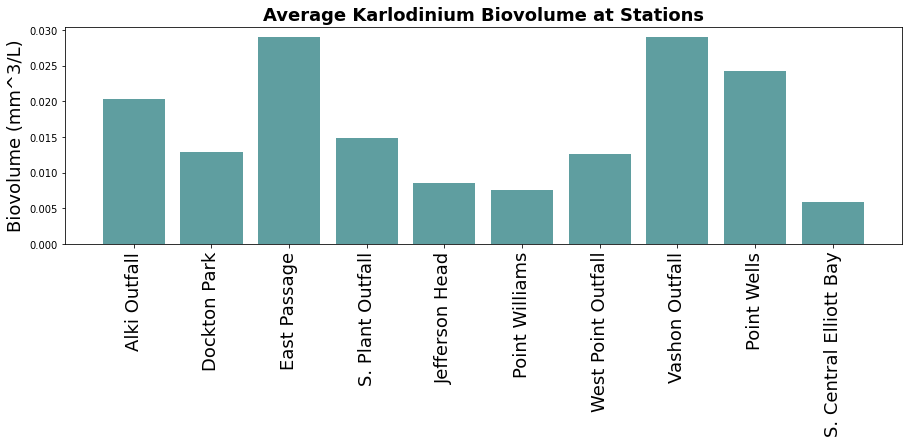

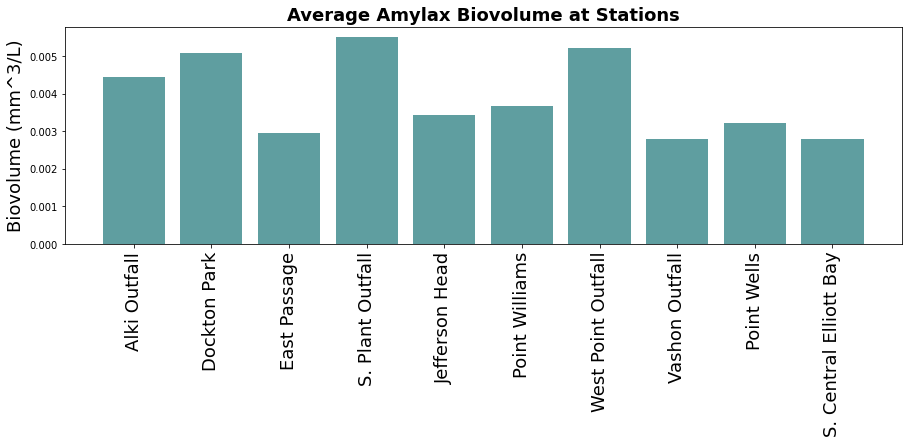

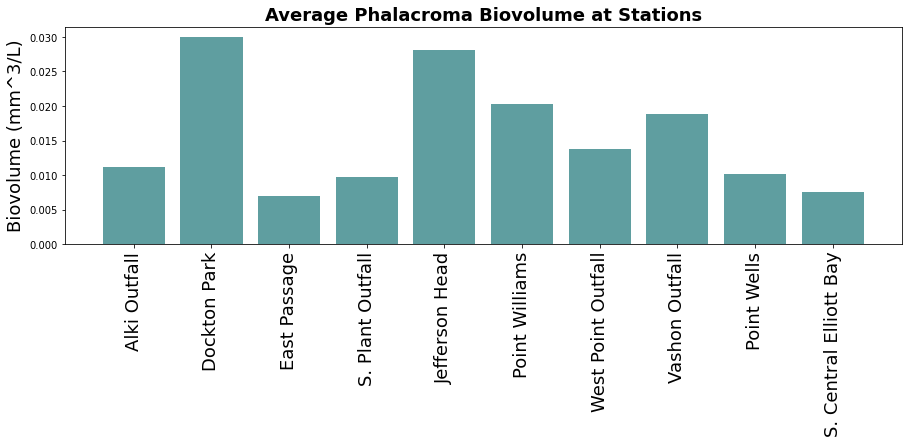

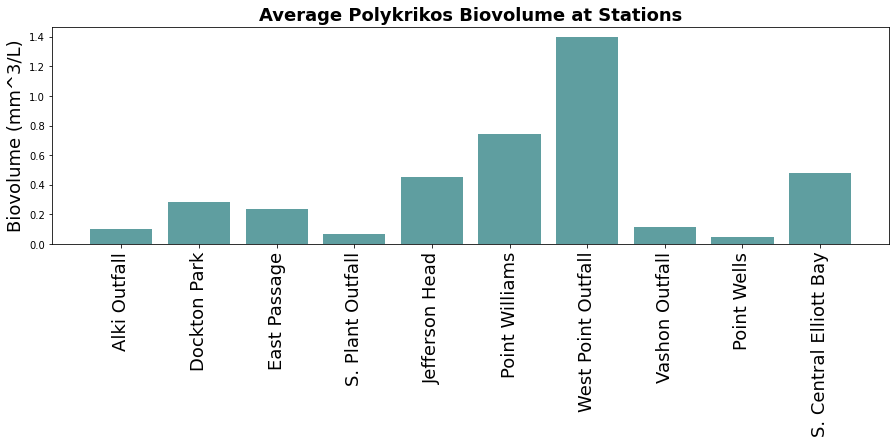

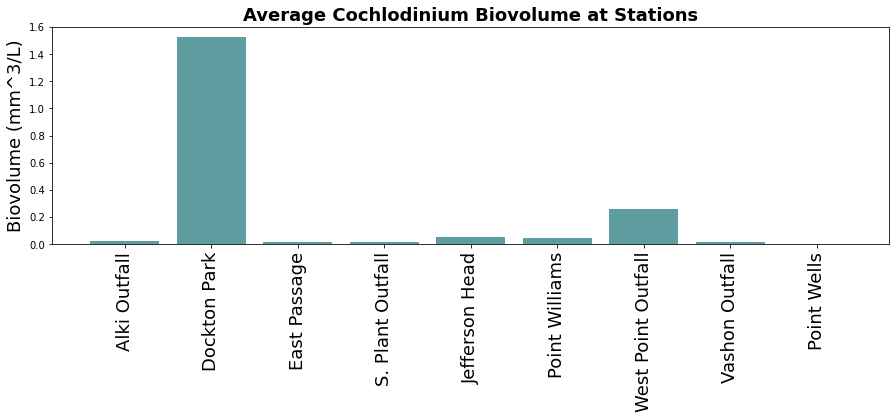

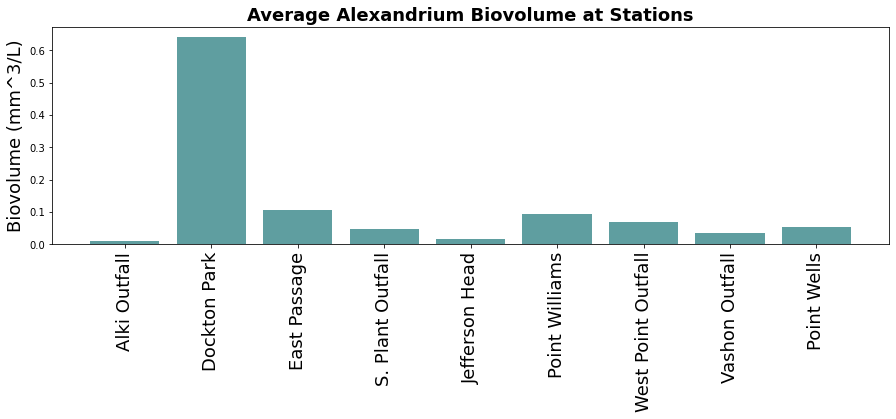

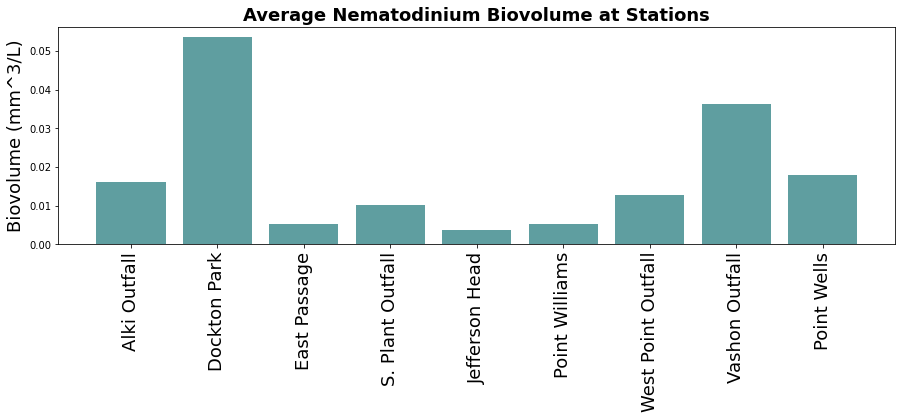

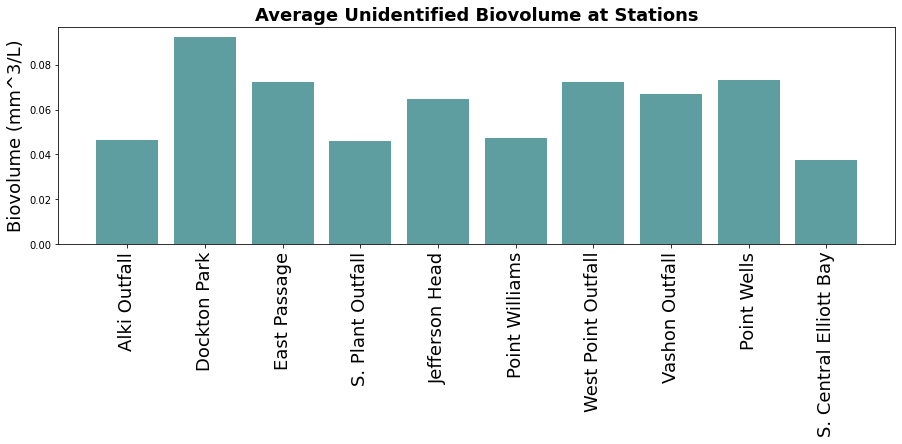

In [ ]:
#averages bar plots
s = ['Alki Outfall', 'Dockton Park', 'East Passage', 'S. Plant Outfall', 'Jefferson Head', 'Point Williams', 'West Point Outfall', 'Vashon Outfall', 'Point Wells', 'S. Central Elliott Bay']
y = [Kat, Pror, Neo, Pro, Din, Aka, Noc, Amp, Hee, Scr, Tor, Gon, Pro, Kar, Amy, Pha, Pol, Coc, Alex, Nema, Other]

fig, ax = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Katodinium Biovolume at Stations ', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax.bar(s, Kat, color = 'cadetblue')

fig, ax1 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 10)
plt.title('Average Prorocentrum Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax1.bar(s, Pror, color = 'cadetblue')

fig, ax2 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Neoceratium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax2.bar(s, Neo, color = 'cadetblue')

fig, ax3 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Protoperidinium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax3.bar(s, Pro, color = 'cadetblue')

fig, ax4 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Dinophysis Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax4.bar(s, Din, color = 'cadetblue')

fig, ax5 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Akashiwo Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax5.bar(s, Aka, color = 'cadetblue')

fig, ax6 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Noctiluca Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax6.bar(s, Noc, color = 'cadetblue')

fig, ax7 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Amphidinium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax7.bar(s, Amp, color = 'cadetblue')

fig, ax75 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Heterocapsa Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax75.bar(s, Hee, color = 'cadetblue')

fig, ax8 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Scrippsiella Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax8.bar(s, Scr, color = 'cadetblue')

fig, ax9 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Torodinium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax9.bar(s, Tor, color = 'cadetblue')

fig, ax10 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Gonyaulax Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax10.bar(s, Gon, color = 'cadetblue')

fig, ax11 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Protoceratium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax11.bar(s, Pro, color = 'cadetblue')

fig, ax13 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Karlodinium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax13.bar(s, Kar, color = 'cadetblue')

fig, ax14 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Amylax Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax14.bar(s, Amy, color = 'cadetblue')

fig, ax15 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Phalacroma Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax15.bar(s, Pha, color = 'cadetblue')

fig, ax11 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Polykrikos Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax11.bar(s, Pol, color = 'cadetblue')

fig, ax16 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Cochlodinium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax16.bar(s, Coc, color = 'cadetblue')

fig, ax17 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Alexandrium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax17.bar(s, Alex, color = 'cadetblue')

fig, ax18 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Nematodinium Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax18.bar(s, Nema, color = 'cadetblue')

fig, ax19 = plt.subplots(figsize = (15, 4))
plt.xticks(rotation=90, fontsize = 18)
plt.title('Average Unidentified Biovolume at Stations', fontsize = 18, fontweight = 'bold' )
plt.ylabel('Biovolume (mm^3/L)', fontsize = 18)
ax19.bar(s, Other, color = 'cadetblue')

In [ ]:
#highest biovolume sites
#dock : prorocentrum, neoceratium, dinophysis, akashiwo, scrippsiella, cochlodinium, alexandrium, nematodinium (less defined biovolume)
#jefferson: protoperidinium, protoceratium
#west point outfall: noctiluca, polykrikos
##east passage : Torodinium (less defined with biovolume)
#point wells: heterocapsa

#too evenly distributed:
##gonyaulax (east passage, s plant outfall, point will)
##katodinium(dock, west point),
##amphidinium(point wells, west, alki, jeff)
##karlodinium (east passage, vashon, point wells)
##Amylax (dock, west point outfall, s plant outfall)
##Phalacroma (dock, jeff, point/vashon)

In [ ]:
#dock
prory = Dock.loc[Dock['Genus']=='Prorocentrum']
neoy = Dock.loc[Dock['Genus']=='Neoceratium (prev. Ceratium)']
diny  = Dock.loc[Dock['Genus']=='Dinophysis']
akay = Dock.loc[Dock['Genus']=='Akashiwo']
scry = Dock.loc[Dock['Genus']=='Scrippsiella']
cocy = Dock.loc[Dock['Genus']=='Cochlodinium']
alexy = Dock.loc[Dock['Genus']=='Alexandrium']
nocy = West.loc[West['Genus']=='Noctiluca']
proty = Jeff.loc[Jeff['Genus']=='Protoperidinium']

# fig, ax = plt.subplots(8, 1, figsize=(20, 80))
# ax[0].bar(prory.index.values,prory['Biovolume'], color = 'blue')

# ax[1].bar(neoy.index.values,neoy['Biovolume'], color = 'red')

# ax[2].bar(diny.index.values,diny['Biovolume'], color = 'red')

# ax[3].bar(akay.index.values,akay['Biovolume'], color = 'red')

# ax[4].bar(scry.index.values,scry['Biovolume'], color = 'red')

# ax[5].bar(cocy.index.values,cocy['Biovolume'], color = 'red')

# ax[6].bar(alexy.index.values,alexy['Biovolume'], color = 'red')

# plt.ylim([0,6])
# plt.tight_layout()

#get max peaks of each year dockton
def max(o):
    max = []
    max.append(o.loc[o['Biovolume'] == o['Biovolume'].sort_index().loc['20150101':'20151231'].max()])
    max.append(o.loc[o['Biovolume'] == o['Biovolume'].sort_index().loc['20160101':'20161231'].max()])
    max.append(o.loc[o['Biovolume'] == o['Biovolume'].sort_index().loc['20170101':'20171231'].max()])
    max.append(o.loc[o['Biovolume'] == o['Biovolume'].sort_index().loc['20180101':'20181231'].max()])
    max.append(o.loc[o['Biovolume'] == o['Biovolume'].sort_index().loc['20190101':'20191231'].max()])
    max.append(o.loc[o['Biovolume'] == o['Biovolume'].sort_index().loc['20200101':'20201231'].max()])
    max.append(o.loc[o['Biovolume'] == o['Biovolume'].sort_index().loc['20210101':'20211231'].max()])
    return max

mPror = max(prory)
mNeoy = max(neoy)
mDiny = max(diny)
mAkay = max(akay)
mScry = max(scry)
mCocy = max(cocy)
mAlexy = max(alexy)
mNocy = max(nocy)
mProty = max(proty)

def maxy(hee):
  mal = []
  mal.append(hee[0]['Biovolume'])
  mal.append(hee[1]['Biovolume'])
  mal.append(hee[2]['Biovolume'])
  mal.append(hee[3]['Biovolume'])
  mal.append(hee[4]['Biovolume'])
  mal.append(hee[5]['Biovolume'])
  mal.append(hee[6]['Biovolume'])
  return mal

mP = maxy(mPror)
mN = maxy(mNeoy)
mD = maxy(mDiny)
mAk = maxy(mAkay)
mS = maxy(mScry)
mC = maxy(mCocy)
mAx = maxy(mAlexy)
mNc = maxy(mNocy)
mPt = maxy(mProty)

In [ ]:
# print(mP) # 2020-10-07    7.693, (2015)10/7-9/7-9/6-7/25-9/4-10/7-9/8 (2021)
# print(mN) # 2018-09-05    89.48, 8/19-9/7-9/20-9/5-7/17-10/7-6/9
# print(mD) # 2016-10-05    0.9069, 5/20-10/5-9/6-8/8-8/21-8/18-8/4
# print(mAk) # 2019-09-18    49.08,  8/19-9/21-9/20-9/5-9/18-10/21-8/4
# print(mS) # 2019-04-17    0.2616, 2/18-9/7-9/20-12/19-4/17-12/9-3/3
# print(mC) # 2017-09-20    4.893, 15/8/19-17/9/20-21/9/23
# print(mAx) # 2018-09-05    2.832, 9/7-9/20-9/5-9/18
# print(mNc) # 2020-06-17    28.17, 6/2-10/1-5/6-6/1-6/7
# print(mPt) #2020-08-03    10.92, 4/20-6/07-5/15-5/7-5/6-8/3-4/19

[Collect Date
2015-04-20    0.1608
Name: Biovolume, dtype: float64, Collect Date
2021-06-07    0.07623
2016-06-06    0.07623
Name: Biovolume, dtype: float64, Collect Date
2017-05-15    0.1509
Name: Biovolume, dtype: float64, Collect Date
2018-05-07    0.2944
Name: Biovolume, dtype: float64, Collect Date
2019-05-06    0.0567
Name: Biovolume, dtype: float64, Collect Date
2020-08-03    10.92
Name: Biovolume, dtype: float64, Collect Date
2021-04-19    0.7294
Name: Biovolume, dtype: float64]


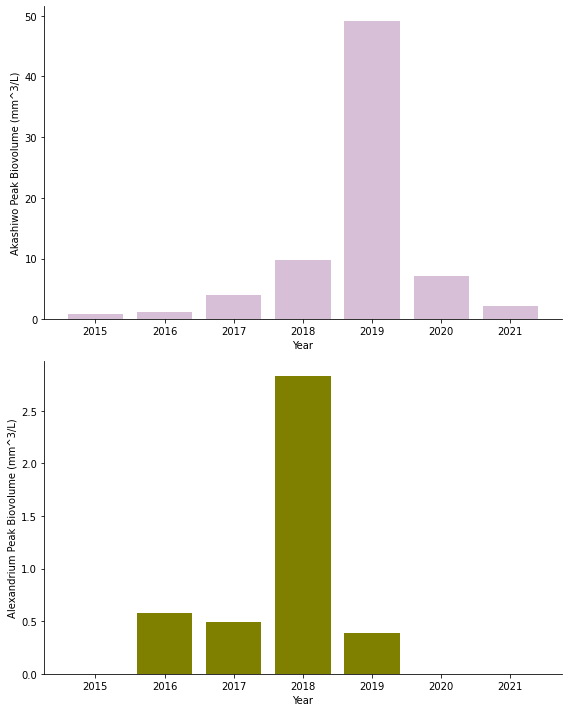

In [ ]:
# get month of that
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']
peaks_mP = [0.2168, 0.8272, 1.593, 0.8671, 1.65, 7.693, 0.4337]
peaks_mN = [1.577, 0.8078, 7.846, 89.48, 0.24, 1.093, 0.3451]
peaks_mD = [0.05575,0.9069, 0.173, 0.3819, 0.06576, 0.5644, 0.07055]
peaks_mAk = [0.9034, 1.24, 3.955, 9.709, 49.08, 7.197, 2.239]
peaks_mS = [0.01267, 0.07618, 0.04093, 0.01132, 0.2616, 0.02567, 0.02704]
peaks_mC = [0.004074, 0, 4.893, 0, 0, 0, 4.354]
peaks_mAx = [0, 0.5812, 0.4963, 2.832, 0.3916, 0, 0]


fig, ax = plt.subplots(2, 1, figsize = (8, 10))

# ax[0].bar(years, peaks_mP, color = 'cadetblue')
# ax[0].set(ylabel = 'Prorocentrum Peak Biovolume (mm^3/L)', xlabel = 'Year')
# right = ax[0].spines["right"]
# top = ax[0].spines['top']
# right.set_visible(False)
# top.set_visible(False)

# ax[1].bar(years, peaks_mN, color = 'pink')
# ax[1].set(ylabel = 'Neoceratium Peak Biovolume (mm^3/L)', xlabel = 'Year')
# right1 = ax[1].spines["right"]
# top1 = ax[1].spines['top']
# right1.set_visible(False)
# top1.set_visible(False)

# ax[2].bar(years, peaks_mD, color = 'darkseagreen')
# ax[2].set(ylabel = 'Dinophysis Peak Biovolume (mm^3/L)', xlabel = 'Year')
# right2 = ax[2].spines["right"]
# top2 = ax[2].spines['top']
# right2.set_visible(False)
# top2.set_visible(False)


ax[0].bar(years, peaks_mAk, color = 'thistle')
ax[0].set(ylabel = 'Akashiwo Peak Biovolume (mm^3/L)', xlabel = 'Year')
right3 = ax[0].spines["right"]
top3 = ax[0].spines['top']
right3.set_visible(False)
top3.set_visible(False)

# ax[4].bar(years, peaks_mS, color = 'darkcyan')
# ax[4].set(ylabel = 'Scrippsiella Peak Biovolume (mm^3/L)', xlabel = 'Year')
# right4 = ax[4].spines["right"]
# top4 = ax[4].spines['top']
# right4.set_visible(False)
# top4.set_visible(False)

# ax[5].bar(years, peaks_mC, color = 'rosybrown')
# ax[5].set(ylabel = 'Cochlodinium Peak Biovolume (mm^3/L)', xlabel = 'Year')
# right5 = ax[5].spines["right"]
# top5 = ax[5].spines['top']
# right5.set_visible(False)
# top5.set_visible(False)

ax[1].bar(years, peaks_mAx, color = 'olive')
ax[1].set(ylabel = 'Alexandrium Peak Biovolume (mm^3/L)', xlabel = 'Year')
right6 = ax[1].spines["right"]
top6 = ax[1].spines['top']
right6.set_visible(False)
top6.set_visible(False)

plt.tight_layout()

# peaks consistently in september at this station, for gym(2019), gony(2018), diny(2016), pror(oct 2020)

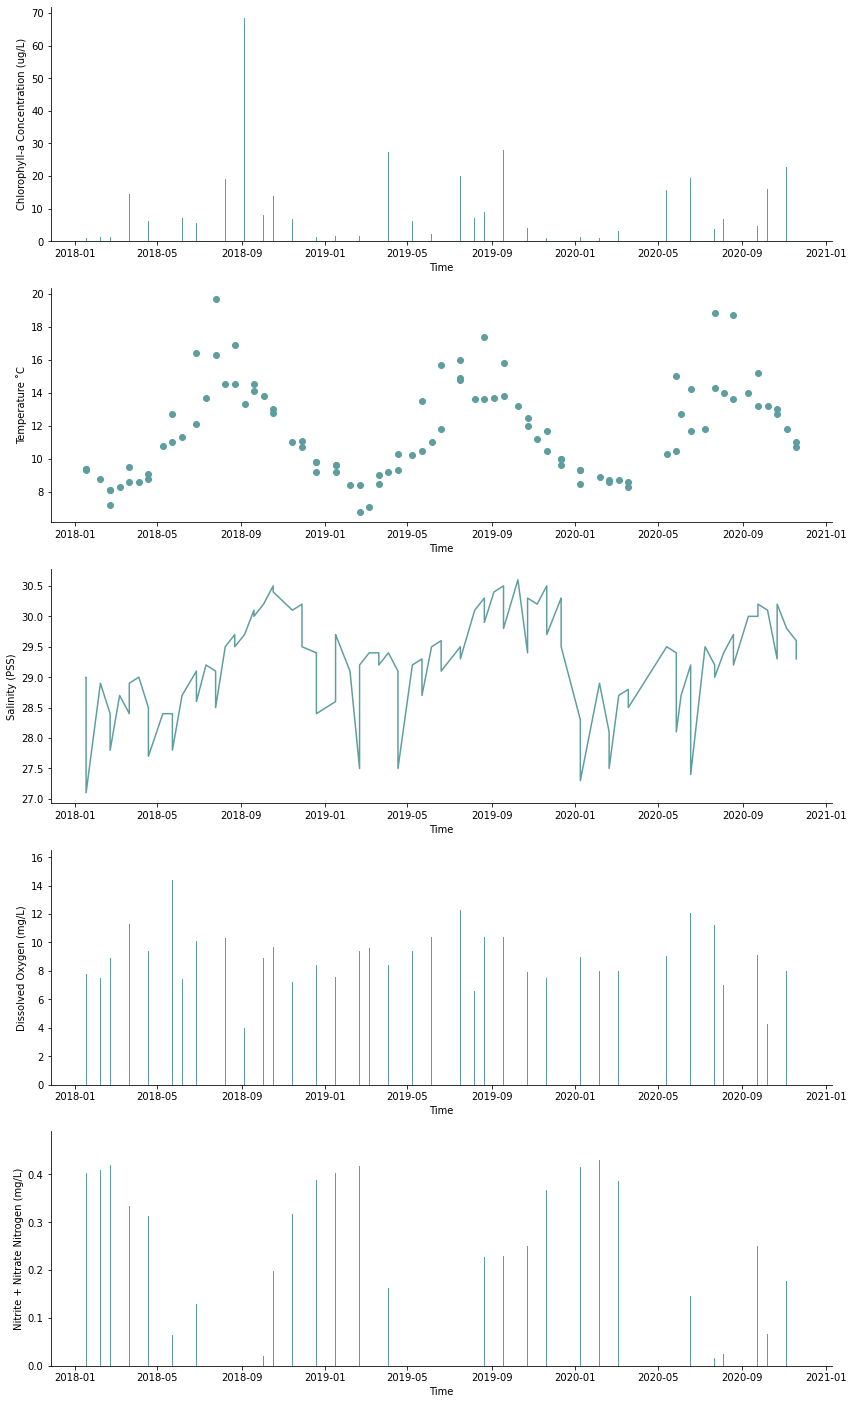

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(14, 25))
y  = par('Dockton Park','Chl')['Value'].sort_index().loc['20180101':'20201201']  #y.shape #32,
w  = par('Dockton Park','Temp')['Value'].sort_index().loc['20180101':'20201201'] #w.shape #33
s = par('Dockton Park','Sal')['Value'].sort_index().loc['20180101':'20201201']   #s.shape #33
o = par('Dockton Park','Oxy')['Value'].sort_index().loc['20180101':'20201201']   #o.shape #7
n = par('Dockton Park','Nit')['Value'].sort_index().loc['20180101':'20201201']   #n.shape #32

#chl
ax[0].bar(par('Dockton Park','Chl').sort_index().loc['20180101':'20201201'].index, y, color = 'cadetblue')
ax[0].set(ylabel = 'Chlorophyll-a Concentration (ug/L)', xlabel = 'Time')
right = ax[0].spines["right"]
top = ax[0].spines['top']
right.set_visible(False)
top.set_visible(False)

#temp
ax[1].scatter(par('Dockton Park','Temp').sort_index().loc['20180101':'20201201'].index, w, color = 'cadetblue')
ax[1].set(ylabel = 'Temperature ˚C', xlabel = 'Time')
right1 = ax[1].spines["right"]
top1 = ax[1].spines['top']
right1.set_visible(False)
top1.set_visible(False)

#sal
ax[2].plot(par('Dockton Park','Sal').sort_index().loc['20180101':'20201201'].index, s, color = 'cadetblue')
ax[2].set(ylabel = 'Salinity (PSS)', xlabel = 'Time')
right2 = ax[2].spines["right"]
top2 = ax[2].spines['top']
right2.set_visible(False)
top2.set_visible(False)

#oxy
ax[3].bar(par('Dockton Park','Oxy').sort_index().loc['20180101':'20201201'].index, o, color = 'cadetblue')
ax[3].set(ylabel = 'Dissolved Oxygen (mg/L)', xlabel = 'Time')
right3 = ax[3].spines["right"]
top3 = ax[3].spines['top']
right3.set_visible(False)
top3.set_visible(False)

#Nit
ax[4].bar(par('Dockton Park','Nit').sort_index().loc['20180101':'20201201'].index, n, color = 'cadetblue')
ax[4].set(ylabel = 'Nitrite + Nitrate Nitrogen (mg/L)', xlabel = 'Time')
right4 = ax[4].spines["right"]
top4 = ax[4].spines['top']
right4.set_visible(False)
top4.set_visible(False)

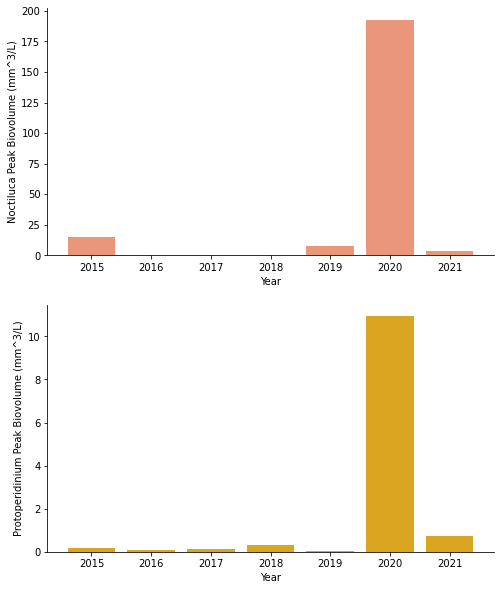

In [ ]:
#west point outfall: noctiluca
# peaks
peaks_mNc = [14.67, 0, 0,  0.00793, 7.197, 192.6, 3.259]
#jefferson: protoperidinium]
#peaks
peaks_mPt = [0.1608,0.07623, 0.1509, 0.2944, 0.0567, 10.92, 0.7294]


years1 = ['2015','2016','2017', '2018', '2019', '2020', '2021']


fig, ax = plt.subplots(2, 1, figsize = (8, 10))
ax[0].bar(years1, peaks_mNc, color = 'darksalmon')
ax[0].set(ylabel = 'Noctiluca Peak Biovolume (mm^3/L)', xlabel = 'Year')
right = ax[0].spines["right"]
top = ax[0].spines['top']
right.set_visible(False)
top.set_visible(False)

ax[1].bar(years1, peaks_mPt, color = 'goldenrod')
ax[1].set(ylabel = 'Protoperidinium Peak Biovolume (mm^3/L)', xlabel = 'Year')
right1 = ax[1].spines["right"]
top1 = ax[1].spines['top']
right1.set_visible(False)
top1.set_visible(False)

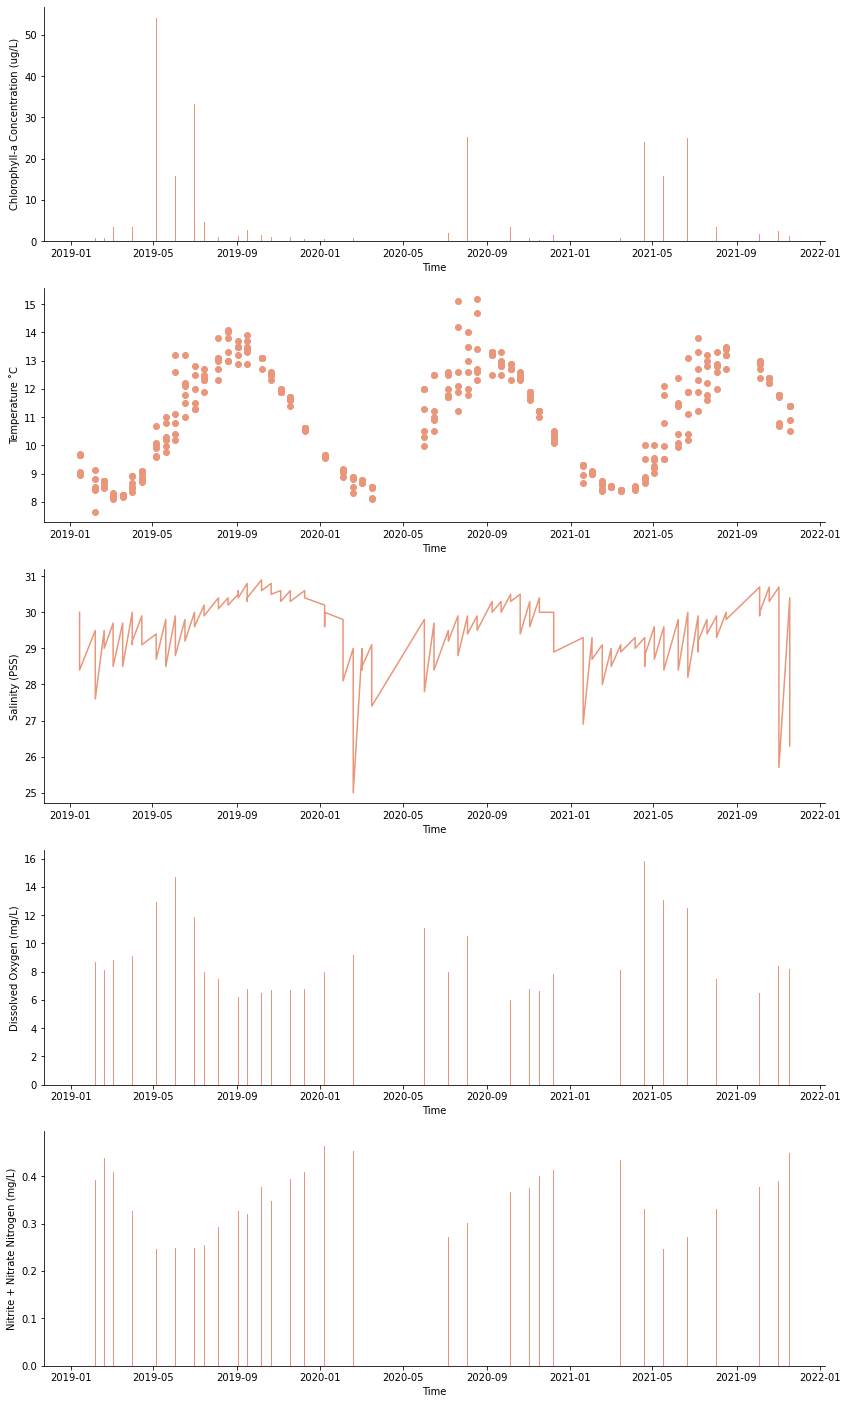

In [ ]:
# get temp data etc for each of these months
# noct print(mNc) # 2020-06-17    28.17, 6/2-10/1-5/6-6/1-6/7
# par('','Chlory')'Temp'/'Chl'/'Sal'/'Oxy'/'Nit')

yN  = par('West Point Outfall','Chl')['Value'].sort_index().loc['20190101':'20211201']  #y.shape #32,
wN  = par('West Point Outfall','Temp')['Value'].sort_index().loc['20190101':'20211201'] #w.shape #33
sN = par('West Point Outfall','Sal')['Value'].sort_index().loc['20190101':'20211201']   #s.shape #33
oN = par('West Point Outfall','Oxy')['Value'].sort_index().loc['20190101':'20211201']   #o.shape #7
nN = par('West Point Outfall','Nit')['Value'].sort_index().loc['20190101':'20211201']   #n.shape #32

fig, ax = plt.subplots(5, 1, figsize=(14, 25))

#chl
ax[0].bar(par('West Point Outfall','Chl').sort_index().loc['20190101':'20211201'].index, yN, color = 'darksalmon')
ax[0].set(ylabel = 'Chlorophyll-a Concentration (ug/L)', xlabel = 'Time')
right = ax[0].spines["right"]
top = ax[0].spines['top']
right.set_visible(False)
top.set_visible(False)

#temp
ax[1].scatter(par('West Point Outfall','Temp').sort_index().loc['20190101':'20211201'].index, wN, color = 'darksalmon')
ax[1].set(ylabel = 'Temperature ˚C', xlabel = 'Time')
right1 = ax[1].spines["right"]
top1 = ax[1].spines['top']
right1.set_visible(False)
top1.set_visible(False)

#sal
ax[2].plot(par('West Point Outfall','Sal').sort_index().loc['20190101':'20211201'].index, sN, color = 'darksalmon')
ax[2].set(ylabel = 'Salinity (PSS)', xlabel = 'Time')
right2 = ax[2].spines["right"]
top2 = ax[2].spines['top']
right2.set_visible(False)
top2.set_visible(False)

#oxy
ax[3].bar(par('West Point Outfall','Oxy').sort_index().loc['20190101':'20211201'].index, oN, color = 'darksalmon')
ax[3].set(ylabel = 'Dissolved Oxygen (mg/L)', xlabel = 'Time')
right3 = ax[3].spines["right"]
top3 = ax[3].spines['top']
right3.set_visible(False)
top3.set_visible(False)

#Nit
ax[4].bar(par('West Point Outfall','Nit').sort_index().loc['20190101':'20211201'].index, nN, color = 'darksalmon')
ax[4].set(ylabel = 'Nitrite + Nitrate Nitrogen (mg/L)', xlabel = 'Time')
right4 = ax[4].spines["right"]
top4 = ax[4].spines['top']
right4.set_visible(False)
top4.set_visible(False)
#seems to: none :/, 2015 : none



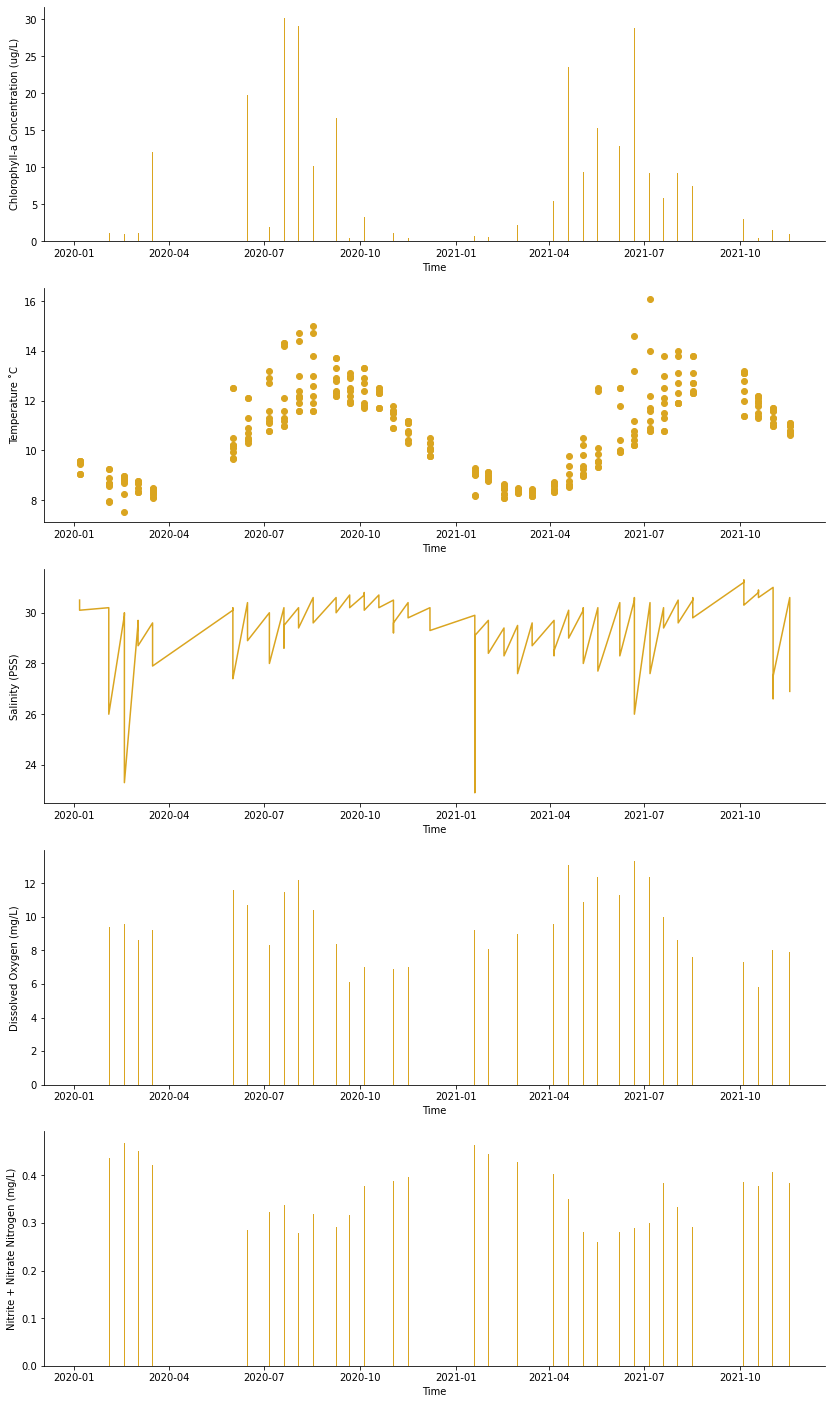

In [ ]:
# get temp data etc for each of these months
# protoperidinium #2020-08-03    10.92, 4/20-6/07-5/15-5/7-5/6-8/3-4/19
# par('','Chlory')'Temp'/'Chl'/'Sal'/'Oxy'/'Nit')

yP  = par('Jefferson Head','Chl')['Value'].sort_index().loc['20200101':'20211201']  #y.shape #32,
wP  = par('Jefferson Head','Temp')['Value'].sort_index().loc['20200101':'20211201'] #w.shape #33
sP = par('Jefferson Head','Sal')['Value'].sort_index().loc['20200101':'20211201']   #s.shape #33
oP = par('Jefferson Head','Oxy')['Value'].sort_index().loc['20200101':'20211201']   #o.shape #7
nP = par('Jefferson Head','Nit')['Value'].sort_index().loc['20200101':'20211201']   #n.shape #32
fig, ax = plt.subplots(5, 1, figsize=(14, 25))
#chl
ax[0].bar(par('Jefferson Head','Chl').sort_index().loc['20200101':'20211201'].index, yP, color = 'goldenrod')
ax[0].set(ylabel = 'Chlorophyll-a Concentration (ug/L)', xlabel = 'Time')
right = ax[0].spines["right"]
top = ax[0].spines['top']
right.set_visible(False)
top.set_visible(False)

#temp
ax[1].scatter(par('Jefferson Head','Temp').sort_index().loc['20200101':'20211201'].index, wP, color = 'goldenrod')
ax[1].set(ylabel = 'Temperature ˚C', xlabel = 'Time')
right1 = ax[1].spines["right"]
top1 = ax[1].spines['top']
right1.set_visible(False)
top1.set_visible(False)


#sal
ax[2].plot(par('Jefferson Head','Sal').sort_index().loc['20200101':'20211201'].index, sP, color = 'goldenrod')
ax[2].set(ylabel = 'Salinity (PSS)', xlabel = 'Time')
right2 = ax[2].spines["right"]
top2 = ax[2].spines['top']
right2.set_visible(False)
top2.set_visible(False)

#oxy
ax[3].bar(par('Jefferson Head','Oxy').sort_index().loc['20200101':'20211201'].index, oP, color = 'goldenrod')
ax[3].set(ylabel = 'Dissolved Oxygen (mg/L)', xlabel = 'Time')
right3 = ax[3].spines["right"]
top3 = ax[3].spines['top']
right3.set_visible(False)
top3.set_visible(False)

#Nit
ax[4].bar(par('Jefferson Head','Nit').sort_index().loc['20200101':'20211201'].index, nP, color = 'goldenrod')
ax[4].set(ylabel = 'Nitrite + Nitrate Nitrogen (mg/L)', xlabel = 'Time')
right4 = ax[4].spines["right"]
top4 = ax[4].spines['top']
right4.set_visible(False)
top4.set_visible(False)
#seems to: chl, temp, sal

In [ ]:
import scipy.stats as stats

# stats.f_oneway(temp[df2['Biovolume'] == 'high'],
#                dCTD.loc[CTD['Parameter'] == 'Temperature'][df2['Biovolume'] == 'low'],
#                CTD.loc[CTD['Parameter'] == 'Temperature'][df2['Biovolume'] == 'placebo'])